# Functional groups

Look at specific examples with unseen functional groups or condensed formulas.

(The last few code blocks were used to test the functions used to expand condensed formulas.)

In [106]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[[0.365, 0.0], [0.079, 0.0], [0.0, 0.0], [0.127, 0.0], [0.317, 0.0], [0.444, 0.0], [0.381, 0.302], [0.317, 0.587], [0.508, 0.302], [0.619, 0.302], [0.587, 0.619], [0.667, 0.873], [0.746, 0.556], [0.746, 0.222], [0.841, 0.476], [0.968, 0.476], [1.0, 0.794], [0.905, 1.0], [0.794, 0.794]]
['[)]', '[(]', 'C', 'C', 'C', 'C', 'C', 'O', 'N', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 

[]

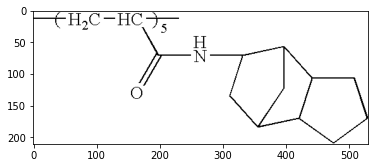

In [205]:
from rdkit import Chem
import pandas as pd
import cv2
import matplotlib.pyplot as plt

gold_file = '../data/molbank/Img2Mol/USPTO.csv'
pred_file = '../output/uspto/swin_base_aux_200k_new1/prediction_USPTO.csv'
idx = 480
# gold_file = '../data/molbank/Img2Mol/CLEF.csv'
# pred_file = '../output/uspto/swin_base_aux_200k_new1/prediction_CLEF.csv'
# idx = 871
# gold_file = '../data/molbank/Img2Mol/JPO.csv'
# pred_file = '../output/uspto/swin_base_aux_200k_new1/prediction_JPO.csv'
# idx = 217
# gold_file = '../data/molbank/Img2Mol/staker.csv'
# pred_file = '../output/uspto/swin_base_aux_200k_new1/prediction_staker.csv'
# idx = 18500
# idx = 27984
# idx = 32444
pred_df = pd.read_csv(pred_file)
gold_df = pd.read_csv(gold_file)
pred_row = pred_df.iloc[idx]
coords, symbols, edges = eval(pred_row['node_coords']), eval(pred_row['node_symbols']), eval(pred_row['edges'])
# symbols[2] = '[C10H29]'
print(coords)
print(symbols)
print(edges)
path = '../' + gold_df.iloc[idx]['file_path']
img = cv2.imread(path)
plt.imshow(img)
plt.plot()

In [220]:
from bms.chemistry import _convert_graph_to_smiles, _postprocess_smiles

# _convert_graph_to_smiles(coords, symbols, edges, debug=True)
# print(pred_row)
print(pred_row['SMILES'])
_postprocess_smiles(pred_row['SMILES'], coords, symbols, edges, debug=True)

[)].[(].CCC(C)C(=O)NC1CC2CC1C1CCCC21


('C.C.CCC(C)C(=O)NC1CC2CC1C1CCCC21',
 '',
 <rdkit.Chem.rdchem.Mol at 0x7f6d4cba4820>)

[Ha]
False
[CHa]
False
[CHa]
False
LEN 7
0 0 [C] C 
1 1 [Ha] C [Ha]
2 2 [CHa] C [CHa]
3 3 [C] C 
4 4 [CHa] C [CHa]
5 5 O O 
6 6 O O 
CC(=O)CC(C)=O


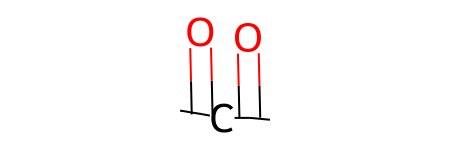

In [203]:
from bms.chemistry import _verify_chirality, _condensed_formula_to_smiles
from bms.constants import RGROUP_SYMBOLS, ABBREVIATIONS

mol = Chem.RWMol()
n = len(symbols)
ids = []
symbol_to_placeholder = {}
PLACEHOLDER_BASE = len(RGROUP_SYMBOLS)
mappings = []
for i in range(n):
    symbol = symbols[i]
    if symbol[0] == '[':
        symbol = symbol[1:-1]
    if symbol in RGROUP_SYMBOLS:
        atom = Chem.Atom("*")
        if symbol[0] == 'R' and symbol[1:].isdigit():
            atom.SetIsotope(RGROUP_SYMBOLS.index(symbol))
        Chem.SetAtomAlias(atom, symbol)
    else:
        try:
            atom = Chem.AtomFromSmiles(symbols[i])
            atom.SetChiralTag(Chem.rdchem.ChiralType.CHI_UNSPECIFIED)
        except:
            print(symbols[i])
            if symbol in ABBREVIATIONS:
                sub_smiles = ABBREVIATIONS[symbol].smiles
                success = True
                bonds_left = 0
                last_idx = 0
                direction = None
            else:
                num_bonds = sum(edges[i])
                sub_smiles, bonds_left, last_idx, direction, success = _condensed_formula_to_smiles(symbol, num_bonds)
                if not sub_smiles or Chem.MolFromSmiles(sub_smiles) is None:
                    success = False
            print(success)
            if success:
                if symbol not in symbol_to_placeholder:
                    j = PLACEHOLDER_BASE + len(symbol_to_placeholder) + 1
                    placeholder = f"[{j}*]"
                    symbol_to_placeholder[symbol] = placeholder
                else:
                    placeholder = symbol_to_placeholder[symbol]
                mappings.append((symbol, None, sub_smiles, bonds_left, last_idx, direction))
                atom = Chem.Atom("*")
                # atom.SetIsotope(int(placeholder[1:-2]))
                Chem.SetAtomAlias(atom, symbol)
            else:
                atom = Chem.Atom("C")
                Chem.SetAtomAlias(atom, symbols[i])
            
    idx = mol.AddAtom(atom)
    assert idx == i
    ids.append(idx)

has_chirality = False

for i in range(n):
    for j in range(i + 1, n):
        if edges[i][j] == 1:
            mol.AddBond(ids[i], ids[j], Chem.BondType.SINGLE)
        elif edges[i][j] == 2:
            mol.AddBond(ids[i], ids[j], Chem.BondType.DOUBLE)
        elif edges[i][j] == 3:
            mol.AddBond(ids[i], ids[j], Chem.BondType.TRIPLE)
        elif edges[i][j] == 4:
            mol.AddBond(ids[i], ids[j], Chem.BondType.AROMATIC)
        elif edges[i][j] == 5:
            mol.AddBond(ids[i], ids[j], Chem.BondType.SINGLE)
            mol.GetBondBetweenAtoms(ids[i], ids[j]).SetBondDir(Chem.BondDir.BEGINWEDGE)
            has_chirality = True
        elif edges[i][j] == 6:
            mol.AddBond(ids[i], ids[j], Chem.BondType.SINGLE)
            mol.GetBondBetweenAtoms(ids[i], ids[j]).SetBondDir(Chem.BondDir.BEGINDASH)
            has_chirality = True

print("LEN", n)
for i in range(n):
    print(i, ids[i], symbols[i], mol.GetAtomWithIdx(i).GetSymbol(), Chem.GetAtomAlias(mol.GetAtomWithIdx(i)))

pred_smiles = '<invalid>'

mol = _verify_chirality(mol, coords, symbols, edges, True)
# molblock is obtained before expanding functional groups. Otherwise the expanded substructure won't have
# coordinates.
pred_molblock = Chem.MolToMolBlock(mol)

BOND_TYPES = {1: Chem.rdchem.BondType.SINGLE, 2: Chem.rdchem.BondType.DOUBLE, 3: Chem.rdchem.BondType.TRIPLE}
molblock=False
if molblock:
    Chem.SanitizeMol(mol)
    AllChem.EmbedMolecule(mol)
mw = Chem.RWMol(mol)
for i, atom in enumerate(mw.GetAtoms()):  # reset radical electrons
    atom.SetNumRadicalElectrons(0)
# for placeholder_atom, sub_smiles in mappings:
#     isotope = int(placeholder_atom[1:-2])
for symbol, isotope, sub_smiles, bonds_left, last_idx, direction in mappings:
    print("BL", bonds_left)
    for i, atom in enumerate(mw.GetAtoms()):
        if atom.GetSymbol() == '*' and (Chem.GetAtomAlias(atom) == symbol or atom.GetIsotope() == isotope):
            bonds = atom.GetBonds()
            adjacent_indices = [bond.GetOtherAtomIdx(i) for bond in bonds]
            for adjacent_idx in adjacent_indices:
                mw.RemoveBond(i, adjacent_idx)

            adjacent_atoms = [mw.GetAtomWithIdx(adjacent_idx) for adjacent_idx in adjacent_indices]
            for adjacent_atom, bond in zip(adjacent_atoms, bonds):
                # print(adjacent_atom.GetSymbol(), bond.GetBondTypeAsDouble())
                adjacent_atom.SetNumRadicalElectrons(int(bond.GetBondTypeAsDouble()))

            print("SUB SMILES:", sub_smiles)
            bonding_atoms_R = [mw.GetNumAtoms()]
            for j, new_atom in enumerate(mR.GetAtoms()):
                if j == 0:
                    if j == last_idx:
                        new_atom.SetNumRadicalElectrons(len(bonds))
                    else:
                        new_atom.SetNumRadicalElectrons(len(bonds) - bonds_left)
                elif j == last_idx:
                    new_atom.SetNumRadicalElectrons(bonds_left)
                    if bonds_left:
                        bonding_atoms_R.append(mw.GetNumAtoms() + j)
                else:
                    new_atom.SetNumRadicalElectrons(0)
                print(new_atom.GetIdx(), new_atom.GetNumRadicalElectrons())
            
            bonding_atoms_w = []
            for j, new_atom in enumerate(mw.GetAtoms()):
                if new_atom.GetNumRadicalElectrons():
                    bonding_atoms_w.append(j)
            
            print(len(bonding_atoms_R), len(bonding_atoms_w))
            if molblock:
                conf = Chem.Conformer(mR.GetNumAtoms())
                conf.Set3D(False)
                atom_pos = mw.GetConformer().GetAtomPosition(i)
                for j in range(mR.GetNumAtoms()):
                    conf.SetAtomPosition(j, atom_pos)
                mR.AddConformer(conf)
            combo = Chem.CombineMols(mw, mR)  # combine two subgraphs into a single graph
            
            mw = Chem.RWMol(combo)
            if len(bonding_atoms_R) == 1:
                for atom in bonding_atoms_w:
                    bond_order = mw.GetAtomWithIdx(atom).GetNumRadicalElectrons()
                    mw.AddBond(atom, bonding_atoms_R[0], order=BOND_TYPES[bond_order])
            else:
                if direction == 1:
                    atom_1R, atom_2R = bonding_atoms_R
                else:
                    atom_2R, atom_1R = bonding_atoms_R
                order_1 = mw.GetAtomWithIdx(atom_1R).GetNumRadicalElectrons()
                order_2 = mw.GetAtomWithIdx(atom_2R).GetNumRadicalElectrons()
                cur_sum = 0
                bonding_atoms_w.sort(key=lambda idx: coords[idx][0])
                for j, atom in enumerate(bonding_atoms_w):
                    cur_sum += mw.GetAtomWithIdx(atom).GetNumRadicalElectrons()
                    if cur_sum == order_1:
                        break
                for k, atom in enumerate(bonding_atoms_w):
                    bond_order = mw.GetAtomWithIdx(atom).GetNumRadicalElectrons()
                    if k <= j:
                        mw.AddBond(atom, atom_1R, order=BOND_TYPES[bond_order])
                    else:
                        mw.AddBond(atom, atom_2R, order=BOND_TYPES[bond_order])
                    
            for atom in bonding_atoms_w:
                mw.GetAtomWithIdx(atom).SetNumRadicalElectrons(0)
            for atom in bonding_atoms_R:
                mw.GetAtomWithIdx(atom).SetNumRadicalElectrons(0)
            
            mw.RemoveAtom(i)
            break
pred_smiles = Chem.MolToSmiles(mw)
mol = mw.GetMol()

print(pred_smiles)
mol

0 *
1.0
1 C
1.0
2 O
2.0
3 O
1.0
4 C
1.0
5 C
1.0
6 C
1.0
7 C
1.0
8 C
1.0
9 O
1.0
10 C
1.0
11 *
1.0
12 O
2.0
13 C
1.0
14 O
1.0
15 C
1.0
16 *
1.0
17 O
2.0


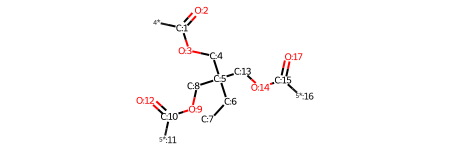

In [131]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

# mol = Chem.MolFromSmiles('CC(C)P(=O)(CC(=O)OC(C)(C)C)C(C)C')
# mol = Chem.MolFromSmiles('CCOP(=O)(OCC)C(C)Cc1c2ccccc2cc2ccccc12')
mol = Chem.MolFromSmiles('[4*]C(=O)OCC(CC)(COC([5*])=O)COC([5*])=O')
for atom in mol.GetAtoms():
    print(atom.GetIdx(), atom.GetSymbol())
    print(atom.GetBonds()[0].GetBondTypeAsDouble())
mol_with_atom_index(mol)

In [81]:
a = Chem.MolFromSmiles('CC(=O)OBr')
b = Chem.MolFromSmiles('Cl[SiH2]I')
ab = Chem.CombineMols(a, b)
# print(a.GetNumAtoms())
# for x in ab.GetAtoms():
#     print(x.GetSymbol())
for x, y in zip(ab.GetAtoms(), list(a.GetAtoms()) + list(b.GetAtoms())):
    print(x.GetSymbol() == y.GetSymbol())
    print(x is y)

True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False


In [143]:
c = Chem.MolFromSmiles('C(O)=O')
atomwise_tokenizer('c%10ccccc%10')

['c', '%10', 'c', 'c', 'c', 'c', 'c', '%10']

In [166]:
from bms.constants import SUBSTITUTIONS
from SmilesPE.pretokenizer import atomwise_tokenizer

def _get_bond_type(char):
    if char == '=':
        return 2
    if char == '#':
        return 3
    return 1

def _get_num_bonds(tokens, idx):
    if idx == 0:
        num_bonds = 0
    else:
        num_bonds = _get_bond_type(tokens[idx-1])
    if idx + 1 < len(tokens):
        next_token = tokens[idx+1]
        if next_token.isdigit() or (next_token[0] == '%' and next_token[1:].isdigit()):
            num_bonds += 1  # assume ring-closing bond is always single bond
            idx += 1
    idx += 1
    while idx < len(tokens):
        depth = 0
        for i in range(idx, len(tokens)):
            if tokens[i] == '(':
                if depth == 0:
                    num_bonds += _get_bond_type(tokens[i+1]) if i + 1 < len(tokens) else 1
                depth += 1
            elif tokens[i] == ')':
                depth -= 1
                if depth == 0:
                    break
                if depth < 0:
                    return num_bonds
            elif depth == 0:
                num_bonds += _get_bond_type(tokens[i])
                return num_bonds
        idx = i + 1
    return num_bonds
            
tokens = ['[R1]', 'C', '(', '=', 'O', ')', 'C', '(', '[OiPr]', ')', '[C2H4O]', 'C', '(', '[OMe]', ')', '(', 'F', ')', 'C', '1', 'C', 'C', 'C', 'C', 'C', '1', '[R2]']
for i in range(len(tokens)):
    print(tokens[i], _get_num_bonds(tokens, i))

[R1] 1
C 4
( 3
= 2
O 2
) 2
C 3
( 2
[OiPr] 1
) 2
[C2H4O] 2
C 4
( 2
[OMe] 1
) 3
( 2
F 1
) 2
C 3
1 2
C 2
C 2
C 2
C 2
C 3
1 2
[R2] 1


In [165]:
print(atomwise_tokenizer("[R1]C(=O)C([OiPr])[C2H4O]C([OMe])(F)C1CCCCC1[R2]"))

['[R1]', 'C', '(', '=', 'O', ')', 'C', '(', '[OiPr]', ')', '[C2H4O]', 'C', '(', '[OMe]', ')', '(', 'F', ')', 'C', '1', 'C', 'C', 'C', 'C', 'C', '1', '[R2]']


In [219]:
def _replace_functional_group(smiles):
    smiles = smiles.replace('<unk>', 'C')
    for i, r in enumerate(RGROUP_SYMBOLS):
        symbol = f'[{r}]'
        if symbol in smiles:
            if r[0] == 'R' and r[1:].isdigit():
                smiles = smiles.replace(symbol, f'[{int(r[1:])}*]')
            else:
                smiles = smiles.replace(symbol, '*')
    mappings = []
    i = 1
    for sub in SUBSTITUTIONS:
        for abbrv in sub.abbrvs:
            symbol = f'[{abbrv}]'
            if symbol in smiles:
                # assert i < len(PLACEHOLDER_ATOMS), "Not enough placeholders"
                while f'[{i}*]' in smiles:
                    i += 1
                # placeholder = PLACEHOLDER_ATOMS[i]
                placeholder = f'[{i}*]'
                while symbol in smiles:
                    smiles = smiles.replace(symbol, placeholder, 1)
                    mappings.append((placeholder, i, sub.smiles, 0, 0, None))
    tokens = atomwise_tokenizer(smiles)
    print(tokens)
    new_tokens = []
    for idx, t in enumerate(tokens):
        if t[0] == '[':
            if Chem.AtomFromSmiles(t) is not None:
                success = True
            else:
                num_bonds = _get_num_bonds(tokens, idx)
                print(t, num_bonds)
                sub_smiles, bonds_left, last_idx, direction, success = _condensed_formula_to_smiles(t[1:-1], num_bonds)
                if not sub_smiles or Chem.MolFromSmiles(sub_smiles) is None:
                    success = False
                if success:
                    while f'[{i}*]' in smiles or f'[{i}*]' in new_tokens:
                        i += 1
                    placeholder = f'[{i}*]'
                    t = placeholder
                    mappings.append((placeholder, i, sub_smiles, bonds_left, last_idx, direction))
            new_tokens.append(t if success else 'C')
        else:
            new_tokens.append(t)
    smiles = ''.join(new_tokens)
    print(smiles)
    print(mappings)
    
# _replace_functional_group("[R1]C(=O)C([OiPr])[C2H4O]C([OMe])[R2]")
_replace_functional_group("[)].[(].CCC(C)C(=O)NC1CC2CC1C1CCCC21")

['[)]', '.', '[(]', '.', 'C', 'C', 'C', '(', 'C', ')', 'C', '(', '=', 'O', ')', 'N', 'C', '1', 'C', 'C', '2', 'C', 'C', '1', 'C', '1', 'C', 'C', 'C', 'C', '2', '1']
[)] 1
[(] 2
C.C.CCC(C)C(=O)NC1CC2CC1C1CCCC21
[]


In [183]:
atom = Chem.AtomFromSmiles('[CO2tBu]')
atom.SetChiralTag(Chem.rdchem.ChiralType.CHI_UNSPECIFIED)

AttributeError: 'NoneType' object has no attribute 'SetChiralTag'

In [186]:
_condensed_formula_to_smiles('OiPr', 1)

('', 1, -1, -1, False)

In [215]:
mol = Chem.MolFromSmiles('')
type(mol)

rdkit.Chem.rdchem.Mol